# check Langleys

In [131]:
import atmPy.radiation.retrievals.langley_calibration as atmlc

## 648

In [ ]:
p2fld = pl.Path('/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/648.langleys/v0.1/')

lt = atmlc.open_langleys(p2fld)

lt.plot_ranked(wl = 500)

lt.V0_simple

## 649

In [363]:
reload(atmlc)

<module 'atmPy.radiation.retrievals.langley_calibration' from '/home/hagen/prog/atm-py/atmPy/radiation/retrievals/langley_calibration.py'>

In [364]:
p2fld = pl.Path('/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/649.langleys/v0.1/')

In [365]:
lt = atmlc.open_langleys(p2fld)

(<Figure size 640x480 with 4 Axes>, array([<Axes: >, <Axes: >], dtype=object))

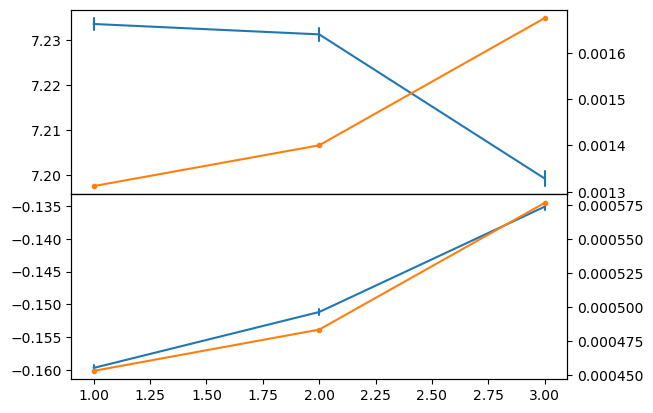

In [368]:
lt.plot_ranked(wl = 500)

In [367]:
lt.V0_simple

<xarray.Dataset> Size: 192B
Dimensions:     (wavelength: 6)
Coordinates:
  * wavelength  (wavelength) int64 48B 415 500 670 870 940 1625
Data variables:
    V0          (wavelength) float64 48B 7.982 7.221 6.766 7.607 7.75 6.241
    V0_std      (wavelength) float64 48B 0.01455 0.01566 ... 0.07766 0.01615
    V0_stderr   (wavelength) float64 48B 0.001476 0.001463 ... 0.00293 0.002138

# create Langles

In [1]:
import atmPy.radiation.retrievals.spectral_irradiance as atmspir

In [334]:
version = '0.1'
p2fld_lang = '/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/{serialno}.langleys/v{version}'

## 648

In [43]:
version = '0.1'
serialno = 648
p2fld = pl.Path(f'/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/{serialno}.cal/v{version}/')

In [44]:
p2flist = list(p2fld.glob('*'))
p2flist.sort()

In [45]:
p2flist

[PosixPath('/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/648.cal/v0.1/frc_648_v0.1_20250924.nc'),
 PosixPath('/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/648.cal/v0.1/frc_648_v0.1_20250925.nc'),
 PosixPath('/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/648.cal/v0.1/frc_648_v0.1_20250926.nc'),
 PosixPath('/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/648.cal/v0.1/frc_648_v0.1_20250927.nc'),
 PosixPath('/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/648.cal/v0.1/frc_648_v0.1_20250928.nc'),
 PosixPath('/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/648.cal/v0.1/frc_648_v0.1_20250929.nc'),
 PosixPath('/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/648.cal/v0.1/frc_648_v0.1_20250930.nc'),
 PosixPath('/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/648.cal/v0.1/frc_648_v0.1_20251001.nc'),
 PosixPath('/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/648.cal/v0.1/frc_648_v0.1_20251002.nc'),
 PosixPath('/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/648.cal/v0.1/frc_648_v0.1_20251003.nc')]

### 202510

In [ ]:
%matplotlib inline

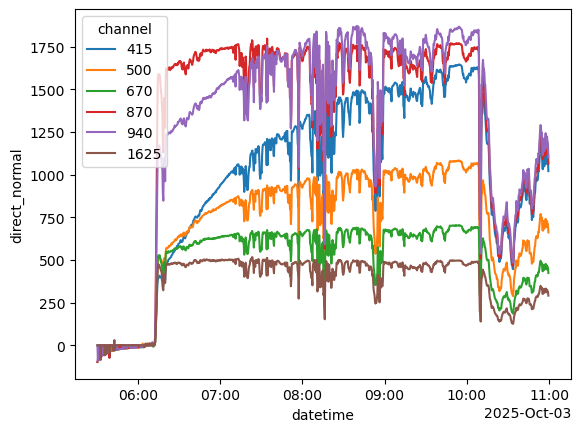

In [ ]:
p2f = pl.Path('/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/648.cal/v0.1/frc_648_v0.1_20251003.nc')
ds = xr.open_mfdataset(p2f)
ds.attrs['site_longitude'] += 360 

ds.direct_normal.plot.line(x = 'datetime')

In [ ]:
reload(atmspir)
reload(atmspir.atmlangcalib)

<module 'atmPy.radiation.retrievals.langley_calibration' from '/home/hagen/prog/atm-py/atmPy/radiation/retrievals/langley_calibration.py'>

In [ ]:
si = atmspir.CombinedGlobalDiffuseDirect(ds)
sir = si.direct_normal_irradiation

In [ ]:
# %matplotlib widget

In [ ]:
lang = sir.langley_am
lc = lang.clean(threshold=2)
langc = lc['langley']

/home/hagen/programms/anaconda3/envs/py312/lib/python3.12/site-packages/pysolar/solartime.py:113: UserWarning: I don't know about leap seconds after 2023
  warnings.warn \
/home/hagen/prog/atm-py/atmPy/radiation/solar.py:125: UserWarning: Discarding nonzero nanoseconds in conversion.
  date = date.to_pydatetime()


skewness: 0.0568	 skewscale:2.2273
skewness: 0.1564	 skewscale:2.6254


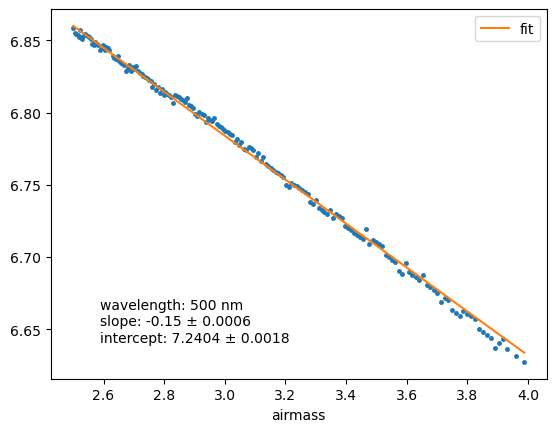

In [ ]:
f,a = langc.plot(wavelength=500, show_pre_clean=False)
# a.set_ylim(bottom = 6.6)

In [ ]:
# p2out = pl.Path(p2fld_lang.format(serialno = serialno, version = version)).joinpath(f'langley_{langc.when}_{p2f.name}')
# if not p2out.is_file():
#     langc.save2netcdf(p2out)
# else:
#     print('File exist!!!')
# p2out    

In [ ]:
lang = sir.langley_pm
lc = lang.clean(threshold=3)
langc = lc['langley']

skewness: -0.1518	 skewscale:4.3660
skewness: -0.0796	 skewscale:3.7166


(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

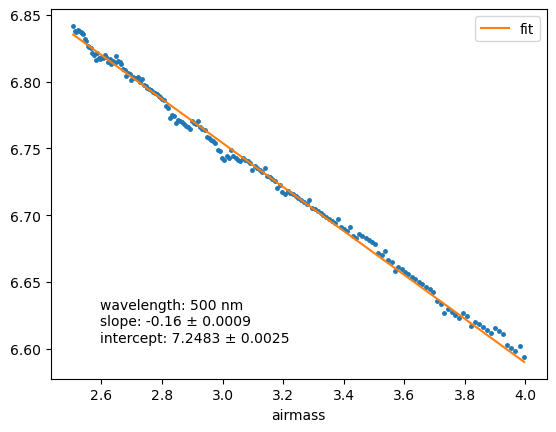

In [ ]:
langc.plot(wavelength=500,show_pre_clean=False)

### 20251002

In [53]:
%matplotlib inline

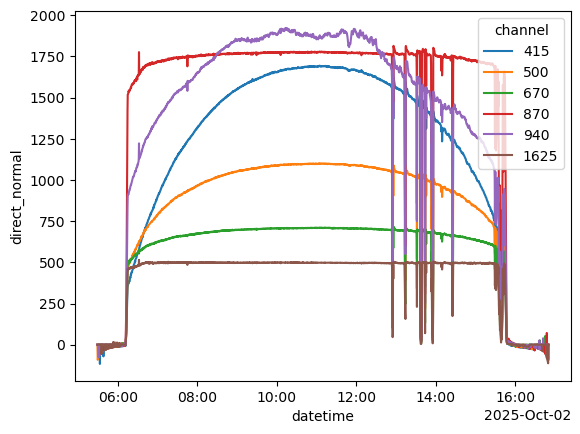

In [54]:
p2f = pl.Path('/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/648.cal/v0.1/frc_648_v0.1_20251002.nc')
ds = xr.open_mfdataset(p2f)
ds.attrs['site_longitude'] += 360 

ds.direct_normal.plot.line(x = 'datetime')

In [55]:
reload(atmspir)
reload(atmspir.atmlangcalib)

<module 'atmPy.radiation.retrievals.langley_calibration' from '/home/hagen/prog/atm-py/atmPy/radiation/retrievals/langley_calibration.py'>

In [56]:
si = atmspir.CombinedGlobalDiffuseDirect(ds)
sir = si.direct_normal_irradiation

In [57]:
# %matplotlib widget

In [58]:
lang = sir.langley_am
lc = lang.clean(threshold=2)
langc = lc['langley']

/home/hagen/programms/anaconda3/envs/py312/lib/python3.12/site-packages/pysolar/solartime.py:113: UserWarning: I don't know about leap seconds after 2023
  warnings.warn \
/home/hagen/prog/atm-py/atmPy/radiation/solar.py:125: UserWarning: Discarding nonzero nanoseconds in conversion.
  date = date.to_pydatetime()


skewness: 0.0568	 skewscale:2.2273
skewness: 0.1564	 skewscale:2.6254


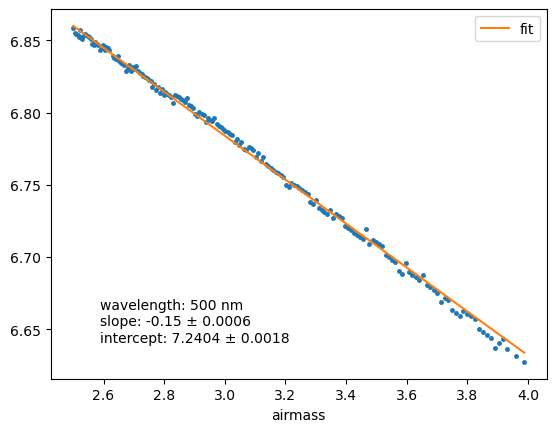

In [59]:
f,a = langc.plot(wavelength=500, show_pre_clean=False)
# a.set_ylim(bottom = 6.6)

In [64]:
p2out = pl.Path(p2fld_lang.format(serialno = serialno, version = version)).joinpath(f'langley_{langc.when}_{p2f.name}')
if not p2out.is_file():
    langc.save2netcdf(p2out)
else:
    print('File exist!!!')
p2out    

PosixPath('/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/648.langleys/v0.1/langley_am_frc_648_v0.1_20251002.nc')

In [370]:
lang = sir.langley_pm
lc = lang.clean(threshold=3)
langc = lc['langley']

skewness: -0.1518	 skewscale:4.3660
skewness: -0.0796	 skewscale:3.7166


(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

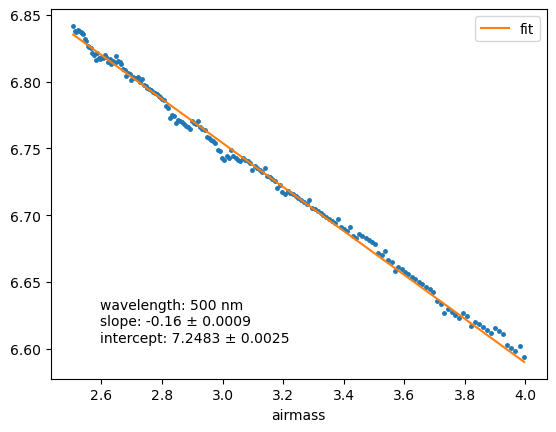

In [371]:
langc.plot(wavelength=500,show_pre_clean=False)

### 20250929

In [323]:
%matplotlib inline

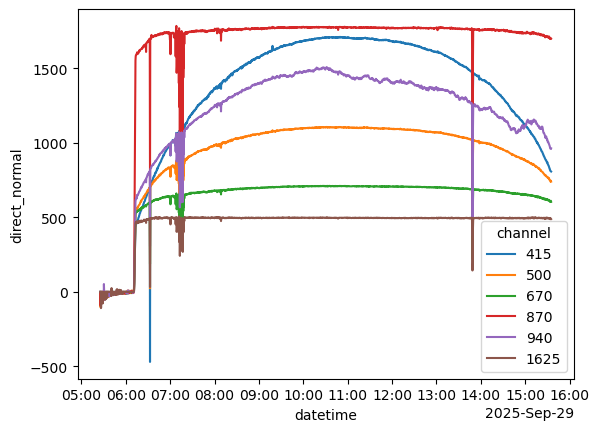

In [353]:
ds = xr.open_mfdataset('/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/648.cal/v0.1/frc_648_v0.1_20250929.nc')
ds.attrs['site_longitude'] += 360 

ds.direct_normal.plot.line(x = 'datetime')

In [354]:
reload(atmspir)
reload(atmspir.atmlangcalib)

<module 'atmPy.radiation.retrievals.langley_calibration' from '/home/hagen/prog/atm-py/atmPy/radiation/retrievals/langley_calibration.py'>

In [355]:
si = atmspir.CombinedGlobalDiffuseDirect(ds)
sir = si.direct_normal_irradiation

In [356]:
# %matplotlib widget

In [357]:
lang = sir.langley_am
lc = lang.clean(threshold=2)
langc = lc['langley']

/home/hagen/programms/anaconda3/envs/py312/lib/python3.12/site-packages/pysolar/solartime.py:113: UserWarning: I don't know about leap seconds after 2023
  warnings.warn \
/home/hagen/prog/atm-py/atmPy/radiation/solar.py:125: UserWarning: Discarding nonzero nanoseconds in conversion.
  date = date.to_pydatetime()


skewness: -0.1476	 skewscale:2.5904
skewness: -0.1520	 skewscale:2.6078
skewness: -0.1266	 skewscale:2.5065
skewness: -0.0794	 skewscale:2.3175
skewness: -0.0148	 skewscale:2.0592
skewness: -0.0186	 skewscale:2.0744
skewness: -0.0103	 skewscale:2.0413
skewness: 0.0290	 skewscale:2.1159
skewness: 0.0708	 skewscale:2.2833
skewness: 0.0950	 skewscale:2.3800


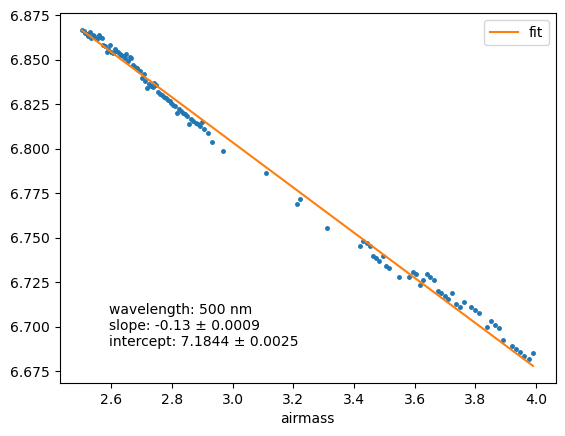

In [358]:
f,a = langc.plot(wavelength=500, show_pre_clean=False)
# a.set_ylim(bottom = 6.6)

In [359]:
lang = sir.langley_pm
lc = lang.clean(threshold=3)
langc = lc['langley']

skewness: -0.0761	 skewscale:3.6850


(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

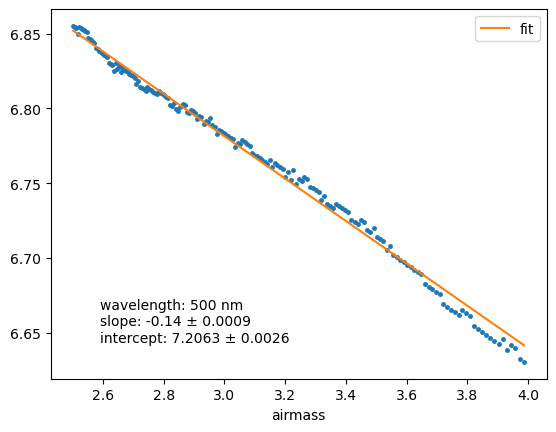

In [360]:
langc.plot(wavelength=500,show_pre_clean=False)

### 20250928

In [72]:
p2f = pl.Path('/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/648.cal/v0.1/frc_648_v0.1_20250928.nc')
ds = xr.open_mfdataset(p2f)
ds.attrs['site_longitude'] += 360 


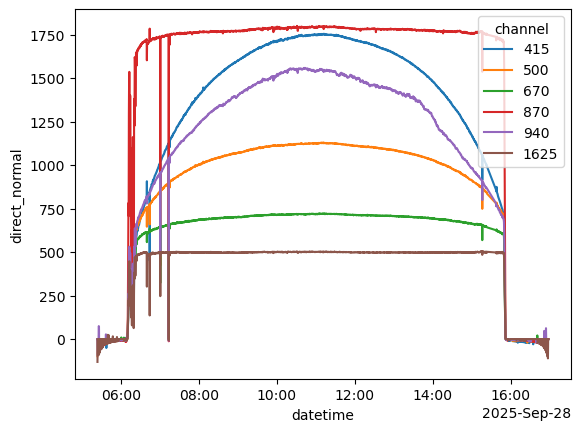

In [73]:
ds.direct_normal.plot.line(x = 'datetime')

In [74]:
reload(atmspir)
reload(atmspir.atmlangcalib)

<module 'atmPy.radiation.retrievals.langley_calibration' from '/home/hagen/prog/atm-py/atmPy/radiation/retrievals/langley_calibration.py'>

In [75]:
si = atmspir.CombinedGlobalDiffuseDirect(ds)
sir = si.direct_normal_irradiation

In [76]:
lang = sir.langley_am
lc = lang.clean(threshold=3)
langc = lc['langley']

/home/hagen/programms/anaconda3/envs/py312/lib/python3.12/site-packages/pysolar/solartime.py:113: UserWarning: I don't know about leap seconds after 2023
  warnings.warn \
/home/hagen/prog/atm-py/atmPy/radiation/solar.py:125: UserWarning: Discarding nonzero nanoseconds in conversion.
  date = date.to_pydatetime()


skewness: -0.1003	 skewscale:3.9028
skewness: -0.0621	 skewscale:3.5587
skewness: -0.0307	 skewscale:3.2759
skewness: -0.0180	 skewscale:3.1622


In [77]:
# %matplotlib inline

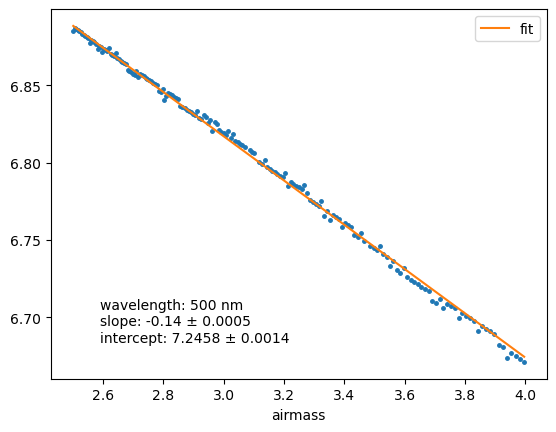

In [78]:
f,a = langc.plot(wavelength=500, show_pre_clean=False)
# a.set_ylim(bottom = 6.6)

In [79]:
p2out = pl.Path(p2fld_lang.format(serialno = serialno, version = version)).joinpath(f'langley_{langc.when}_{p2f.name}')
if not p2out.is_file():
    langc.save2netcdf(p2out)
else:
    print('File exist!!!')
p2out    

PosixPath('/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/648.langleys/v0.1/langley_am_frc_648_v0.1_20250928.nc')

In [80]:
lang = sir.langley_pm
lc = lang.clean(threshold=3)
langc = lc['langley']

skewness: -0.0371	 skewscale:3.3342
skewness: 0.0412	 skewscale:3.3706


(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

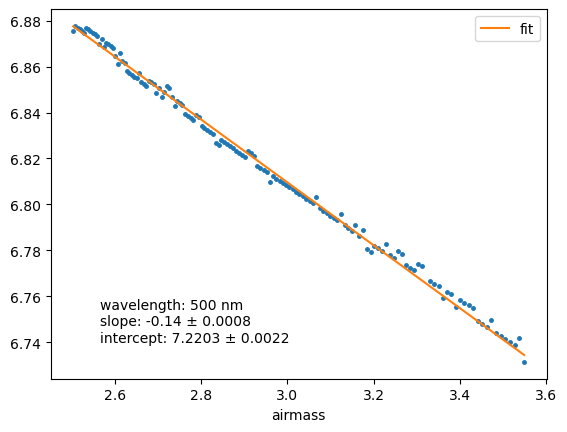

In [81]:
langc.plot(wavelength=500,show_pre_clean=False)

In [82]:
p2out = pl.Path(p2fld_lang.format(serialno = serialno, version = version)).joinpath(f'langley_{langc.when}_{p2f.name}')
if not p2out.is_file():
    langc.save2netcdf(p2out)
else:
    print('File exist!!!')
p2out    

PosixPath('/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/648.langleys/v0.1/langley_pm_frc_648_v0.1_20250928.nc')

## 649

In [3]:
version = '0.1'
serialno = 649
p2fld = pl.Path(f'/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/{serialno}.cal/v{version}/')

In [4]:
p2flist = list(p2fld.glob('*'))
p2flist.sort()

In [5]:
p2flist

[PosixPath('/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/649.cal/v0.1/frc_649_v0.1_20250921.nc'),
 PosixPath('/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/649.cal/v0.1/frc_649_v0.1_20250922.nc'),
 PosixPath('/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/649.cal/v0.1/frc_649_v0.1_20250923.nc'),
 PosixPath('/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/649.cal/v0.1/frc_649_v0.1_20250924.nc'),
 PosixPath('/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/649.cal/v0.1/frc_649_v0.1_20250925.nc'),
 PosixPath('/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/649.cal/v0.1/frc_649_v0.1_20250926.nc'),
 PosixPath('/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/649.cal/v0.1/frc_649_v0.1_20250927.nc'),
 PosixPath('/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/649.cal/v0.1/frc_649_v0.1_20250928.nc'),
 PosixPath('/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/649.cal/v0.1/frc_649_v0.1_20250929.nc'),
 PosixPath('/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/649.cal/v0.1/frc_649_v0.1_20250930.nc'),
 PosixPath('/nfs/grad/Inst/MFR/Campaign/

### 202510

In [ ]:
%matplotlib inline

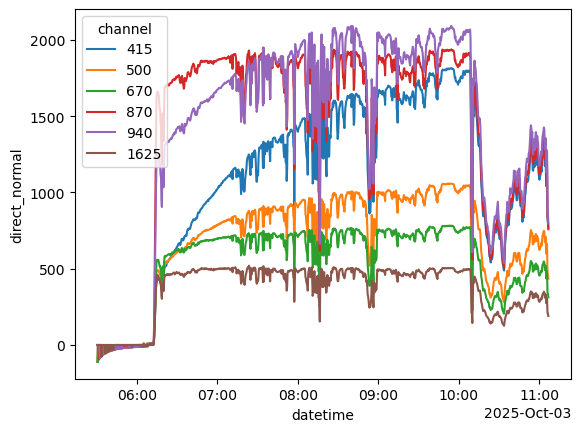

In [19]:
p2f = pl.Path('/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/649.cal/v0.1/frc_649_v0.1_20251003.nc')
ds = xr.open_mfdataset(p2f)
ds.attrs['site_longitude'] += 360 

ds.direct_normal.plot.line(x = 'datetime')

In [20]:
reload(atmspir)
reload(atmspir.atmlangcalib)

<module 'atmPy.radiation.retrievals.langley_calibration' from '/home/hagen/prog/atm-py/atmPy/radiation/retrievals/langley_calibration.py'>

In [21]:
si = atmspir.CombinedGlobalDiffuseDirect(ds)
sir = si.direct_normal_irradiation

In [22]:
# %matplotlib widget

In [23]:
lang = sir.langley_am
lc = lang.clean(threshold=2)
langc = lc['langley']

/home/hagen/programms/anaconda3/envs/py312/lib/python3.12/site-packages/pysolar/solartime.py:113: UserWarning: I don't know about leap seconds after 2023
  warnings.warn \
/home/hagen/prog/atm-py/atmPy/radiation/solar.py:125: UserWarning: Discarding nonzero nanoseconds in conversion.
  date = date.to_pydatetime()


skewness: -0.3103	 skewscale:3.2411
skewness: -0.3013	 skewscale:3.2051
skewness: -0.2771	 skewscale:3.1082
skewness: -0.2062	 skewscale:2.8247
skewness: -0.2037	 skewscale:2.8149
skewness: -0.1830	 skewscale:2.7318
skewness: -0.1522	 skewscale:2.6086
skewness: -0.1161	 skewscale:2.4645
skewness: -0.0495	 skewscale:2.1980
skewness: -0.0260	 skewscale:2.1041
skewness: -0.0105	 skewscale:2.0421
skewness: -0.0276	 skewscale:2.1103
skewness: -0.0081	 skewscale:2.0322
skewness: 0.0024	 skewscale:2.0096
skewness: 0.0014	 skewscale:2.0054
skewness: 0.0013	 skewscale:2.0053


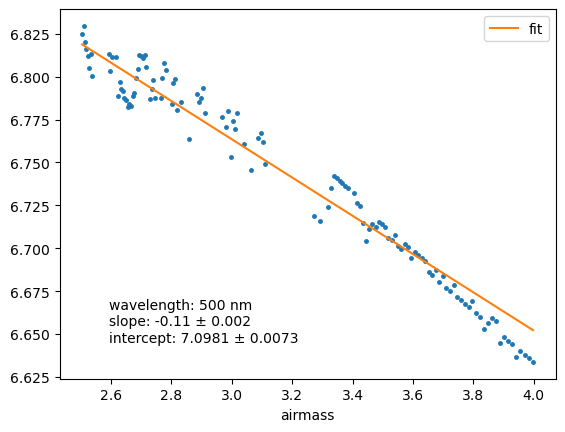

In [24]:
f,a = langc.plot(wavelength=500, show_pre_clean=False)
# a.set_ylim(bottom = 6.6)

In [25]:
# p2out = pl.Path(p2fld_lang.format(serialno = serialno, version = version)).joinpath(f'langley_{langc.when}_{p2f.name}')
# if not p2out.is_file():
#     langc.save2netcdf(p2out)
# else:
#     print('File exist!!!')
# p2out    

In [26]:
lang = sir.langley_pm
lc = lang.clean(threshold=3)
langc = lc['langley']

ValueError: zero-size array to reduction operation maximum which has no identity

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

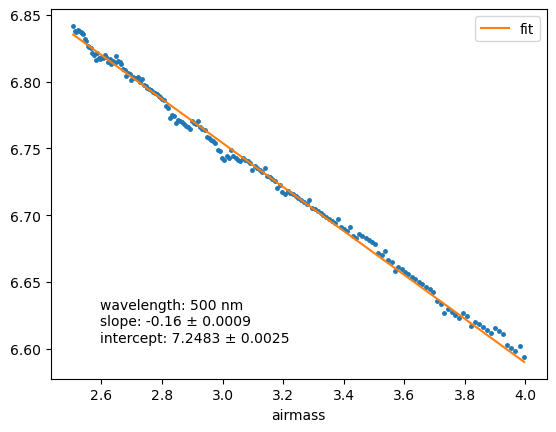

In [ ]:
langc.plot(wavelength=500,show_pre_clean=False)

### 20251002

In [27]:
%matplotlib inline

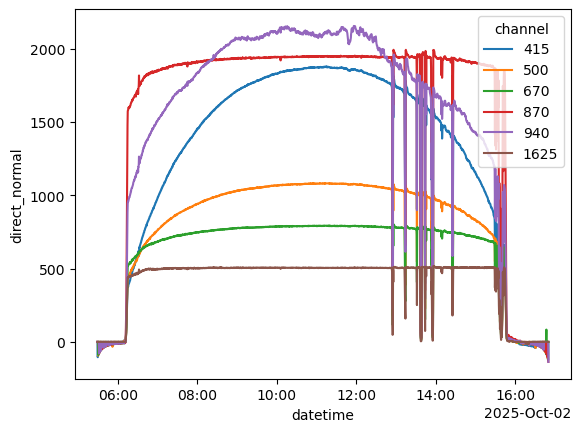

In [36]:
p2f = pl.Path('/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/649.cal/v0.1/frc_649_v0.1_20251002.nc')
ds = xr.open_mfdataset(p2f)
ds.attrs['site_longitude'] += 360 

ds.direct_normal.plot.line(x = 'datetime')

In [37]:
reload(atmspir)
reload(atmspir.atmlangcalib)

<module 'atmPy.radiation.retrievals.langley_calibration' from '/home/hagen/prog/atm-py/atmPy/radiation/retrievals/langley_calibration.py'>

In [38]:
si = atmspir.CombinedGlobalDiffuseDirect(ds)
sir = si.direct_normal_irradiation

In [39]:
# %matplotlib widget

In [40]:
lang = sir.langley_am
lc = lang.clean(threshold=3)
langc = lc['langley']

/home/hagen/programms/anaconda3/envs/py312/lib/python3.12/site-packages/pysolar/solartime.py:113: UserWarning: I don't know about leap seconds after 2023
  warnings.warn \
/home/hagen/prog/atm-py/atmPy/radiation/solar.py:125: UserWarning: Discarding nonzero nanoseconds in conversion.
  date = date.to_pydatetime()


skewness: 0.0713	 skewscale:3.6421


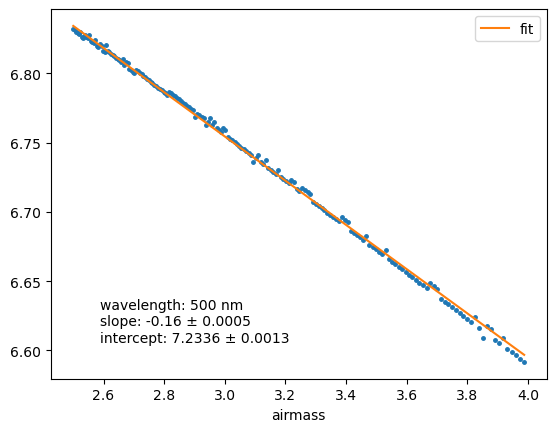

In [41]:
f,a = langc.plot(wavelength=500, show_pre_clean=False)
# a.set_ylim(bottom = 6.6)

In [42]:
p2out = pl.Path(p2fld_lang.format(serialno = serialno, version = version)).joinpath(f'langley_{langc.when}_{p2f.name}')
if not p2out.is_file():
    langc.save2netcdf(p2out)
else:
    print('File exist!!!')
p2out    

PosixPath('/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/649.langleys/v0.1/langley_am_frc_649_v0.1_20251002.nc')

In [16]:
lang = sir.langley_pm
lc = lang.clean(threshold=3)
langc = lc['langley']

skewness: -0.1060	 skewscale:3.9537
skewness: -0.1257	 skewscale:4.1311


(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

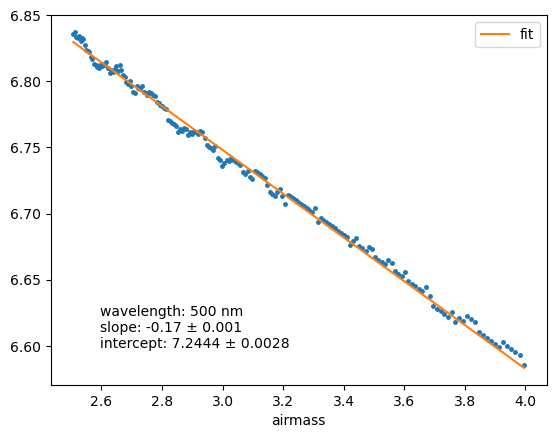

In [17]:
langc.plot(wavelength=500,show_pre_clean=False)

### 20250929

In [18]:
%matplotlib inline

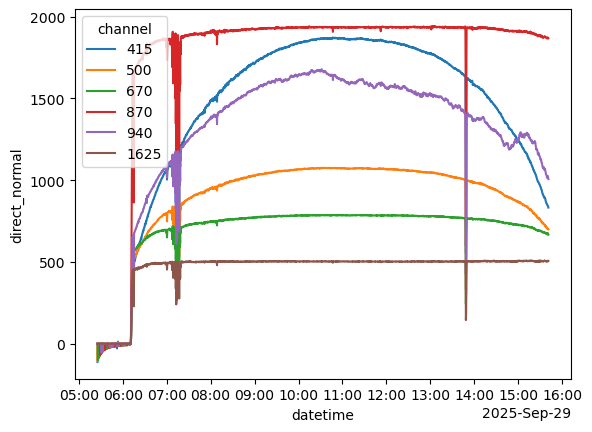

In [20]:
ds = xr.open_mfdataset('/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/649.cal/v0.1/frc_649_v0.1_20250929.nc')
ds.attrs['site_longitude'] += 360 

ds.direct_normal.plot.line(x = 'datetime')

In [21]:
reload(atmspir)
reload(atmspir.atmlangcalib)

<module 'atmPy.radiation.retrievals.langley_calibration' from '/home/hagen/prog/atm-py/atmPy/radiation/retrievals/langley_calibration.py'>

In [22]:
si = atmspir.CombinedGlobalDiffuseDirect(ds)
sir = si.direct_normal_irradiation

In [ ]:
# %matplotlib widge

In [32]:
lang = sir.langley_am
lc = lang.clean(threshold=2.1)
langc = lc['langley']

skewness: -0.1514	 skewscale:2.7676
skewness: -0.1640	 skewscale:2.8232
skewness: -0.1277	 skewscale:2.6631
skewness: -0.0870	 skewscale:2.4836
skewness: -0.0279	 skewscale:2.2232
skewness: -0.0356	 skewscale:2.2568
skewness: -0.0229	 skewscale:2.2008
skewness: 0.0031	 skewscale:2.1139
skewness: 0.0077	 skewscale:2.1340
skewness: 0.0005	 skewscale:2.1023
skewness: -0.0284	 skewscale:2.2254
skewness: -0.0355	 skewscale:2.2565
skewness: -0.0478	 skewscale:2.3107


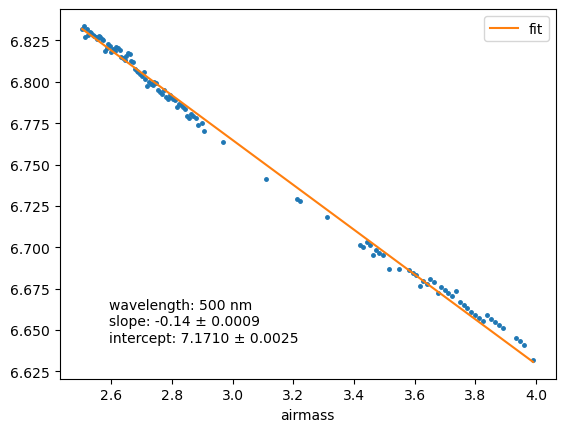

In [33]:
f,a = langc.plot(wavelength=500, show_pre_clean=False)
# a.set_ylim(bottom = 6.6)

In [34]:
lang = sir.langley_pm
lc = lang.clean(threshold=3)
langc = lc['langley']

skewness: 0.0042	 skewscale:3.0378


(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

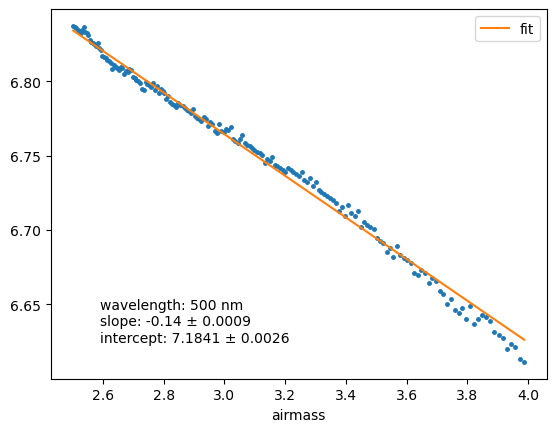

In [35]:
langc.plot(wavelength=500,show_pre_clean=False)

### 20250928

In [6]:
p2f = pl.Path('/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/649.cal/v0.1/frc_649_v0.1_20250928.nc')
ds = xr.open_mfdataset(p2f)
ds.attrs['site_longitude'] += 360 

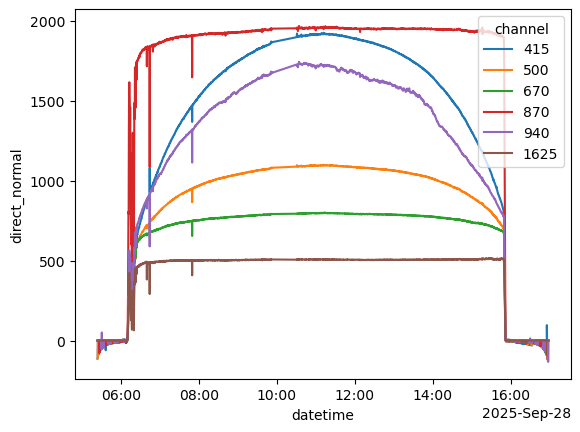

In [7]:
ds.direct_normal.plot.line(x = 'datetime')

In [8]:
reload(atmspir)
reload(atmspir.atmlangcalib)

<module 'atmPy.radiation.retrievals.langley_calibration' from '/home/hagen/prog/atm-py/atmPy/radiation/retrievals/langley_calibration.py'>

In [9]:
si = atmspir.CombinedGlobalDiffuseDirect(ds)
sir = si.direct_normal_irradiation

In [10]:
lang = sir.langley_am
lc = lang.clean(threshold=3)
langc = lc['langley']

/home/hagen/programms/anaconda3/envs/py312/lib/python3.12/site-packages/pysolar/solartime.py:113: UserWarning: I don't know about leap seconds after 2023
  warnings.warn \
/home/hagen/prog/atm-py/atmPy/radiation/solar.py:125: UserWarning: Discarding nonzero nanoseconds in conversion.
  date = date.to_pydatetime()


skewness: -0.0577	 skewscale:3.5194
skewness: 0.0188	 skewscale:3.1695
skewness: 0.0144	 skewscale:3.1292


In [11]:
# %matplotlib inline

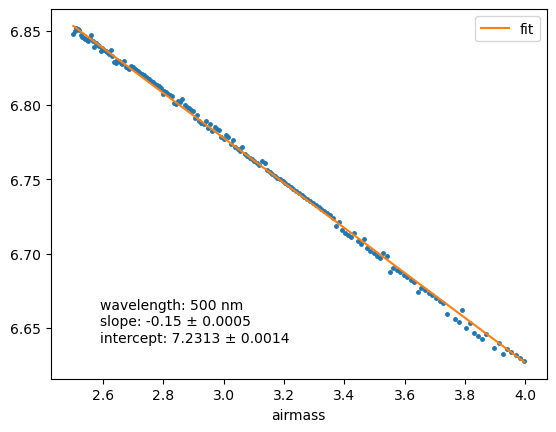

In [12]:
f,a = langc.plot(wavelength=500, show_pre_clean=False)
# a.set_ylim(bottom = 6.6)

In [15]:
p2out = pl.Path(p2fld_lang.format(serialno = serialno, version = version)).joinpath(f'langley_{langc.when}_{p2f.name}')
if not p2out.is_file():
    langc.save2netcdf(p2out)
else:
    print('File exist!!!')
p2out    

File exist!!!


PosixPath('/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/649.langleys/v0.1/langley_am_frc_649_v0.1_20250928.nc')

In [16]:
lang = sir.langley_pm
lc = lang.clean(threshold=3)
langc = lc['langley']

skewness: 0.0431	 skewscale:3.3881


(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

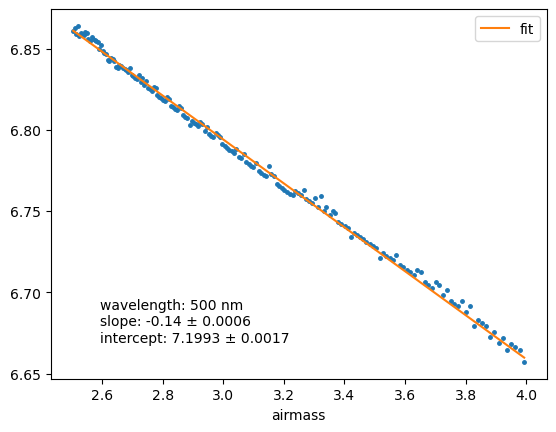

In [17]:
langc.plot(wavelength=500,show_pre_clean=False)

In [18]:
p2out = pl.Path(p2fld_lang.format(serialno = serialno, version = version)).joinpath(f'langley_{langc.when}_{p2f.name}')
if not p2out.is_file():
    langc.save2netcdf(p2out)
else:
    print('File exist!!!')
p2out    

PosixPath('/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/649.langleys/v0.1/langley_pm_frc_649_v0.1_20250928.nc')